In [1]:
import pandas as pd
from pathlib import Path
from sad2_final_project.analysis import add_missing_metrics_from_experiment, loader_obsolete_data
from sad2_final_project.bnfinder import load_external_data

# plots
## global
import matplotlib.pyplot as plt
import seaborn as sns
## local
from sad2_final_project.analysis import plot_boxplot, plot_histogram
# system 
import os

# paths
## set global dir
cwd=Path.cwd()
if cwd.name == "notebooks":
    os.chdir(cwd.parent) 
print(os.getcwd())
## create paths 
DATA_PATH = Path('data/trajectory_length_vs_attractors1')

/home/maxi7524/repositories/SAD2_final_project


In [2]:
df = loader_obsolete_data(DATA_PATH / 'results/metadata.csv', DATA_PATH / 'results/joined_results_trajectory_length_vs_attractors.csv')
metrics_list=['TP', 'FP', 'FN', 'f1', 'accuracy', 'precision', 'recall', 'sensitivity', 'AHD', 'SHD', 'EHD', 'SID']
# df = add_missing_metrics_from_experiment(df, DATA_PATH, metrics_list, after_column='attractor_ratio')
df

,condition_id_num,dataset_succeeded,attractor_ratio,TP,FP,FN,precision,recall,sensitivity,AHD,...,BDe,num_nodes,update_mode,trajectory_length,n_trajectories,sampling_frequency,score_function,n_parents_per_node,rep_id,condition_id_name
0,0,False,0.776667,7.0,3.0,4.0,0.700000,0.636364,0.636364,0.350000,...,2093.753183,5,synchronous,10,50,1,MDL,"[1, 2, 3]",0,0000
1,1,False,0.744000,4.0,7.0,2.0,0.363636,0.666667,0.666667,0.450000,...,3525.393371,5,synchronous,10,50,1,MDL,"[1, 2, 3]",1,0001
2,2,False,0.851333,8.0,2.0,2.0,0.800000,0.800000,0.800000,0.200000,...,3089.352225,5,synchronous,10,50,1,MDL,"[1, 2, 3]",2,0002
3,3,False,0.844000,4.0,4.0,3.0,0.500000,0.571429,0.571429,0.583333,...,3298.020597,5,synchronous,10,50,1,MDL,"[1, 2, 3]",3,0003
4,4,False,0.862667,5.0,1.0,0.0,0.833333,1.000000,1.000000,0.050000,...,4801.738920,5,synchronous,10,50,1,MDL,"[1, 2, 3]",4,0004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,23395,True,0.587805,12.0,2.0,3.0,0.857143,0.800000,0.800000,0.069444,...,3650.863750,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",25,23395
23396,23396,False,0.996585,15.0,8.0,3.0,0.652174,0.833333,0.833333,0.152778,...,14077.049997,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",26,23396
23397,23397,False,1.000000,12.0,11.0,1.0,0.521739,0.923077,0.923077,0.166667,...,12617.349198,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",27,23397
23398,23398,True,0.542195,12.0,5.0,5.0,0.705882,0.705882,0.705882,0.138889,...,3865.383110,9,asynchronous,9,100,5,BDE,"[1, 2, 3]",28,23398


In [3]:
from sad2_final_project.analysis import analyze_datasets_from_index

## DROPPING VALUES |
df_series = df.copy()
### dropping values after 
df_series['scale'] = df_series["trajectory_length"] / df_series["num_nodes"]
df_series = df_series[df_series['scale'] < 1.5]
### dropping sets that have no sense
df_series = df_series[
    (df_series["trajectory_length"] / df_series["sampling_frequency"]) > 1
]
## calculate series 
df_series = add_missing_metrics_from_experiment(df_series, DATA_PATH, metrics_list, after_column='attractor_ratio')
df_series = analyze_datasets_from_index(df_series, 'condition_id_name', DATA_PATH, 1)

/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.sum(s2)) + np.spacing(1)
/home/maxi7524/repositories/SAD2_final_project/.venv/lib/python3.13/site-packages/pysptools/distance/dist.py:78: RuntimeWarning: invalid value encountered in divide
  q = (s2 / np.

[Progress] 3601/8040 conditions completed (44.8%)
[Progress] 3602/8040 conditions completed (44.8%)
[Progress] 3603/8040 conditions completed (44.8%)
[Progress] 3604/8040 conditions completed (44.8%)
[Progress] 3605/8040 conditions completed (44.8%)
[Progress] 3606/8040 conditions completed (44.9%)
[Progress] 3607/8040 conditions completed (44.9%)
[Progress] 3608/8040 conditions completed (44.9%)
[Progress] 3609/8040 conditions completed (44.9%)
[Progress] 3610/8040 conditions completed (44.9%)
[Progress] 3611/8040 conditions completed (44.9%)
[Progress] 3612/8040 conditions completed (44.9%)
[Progress] 3613/8040 conditions completed (44.9%)
[Progress] 3614/8040 conditions completed (45.0%)
[Progress] 3615/8040 conditions completed (45.0%)
[Progress] 3616/8040 conditions completed (45.0%)
[Progress] 3617/8040 conditions completed (45.0%)
[Progress] 3618/8040 conditions completed (45.0%)
[Progress] 3619/8040 conditions completed (45.0%)
[Progress] 3620/8040 conditions completed (45.0%)


pomocnicze funkcje

In [20]:
def signif_stars(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""


In [21]:
def paired_wilcoxon(
    df,
    metric,
    sf_from,
    sf_to,
    id_cols=("rep_id", "num_nodes", "update_mode", "score_function"),
    sf_col="sampling_frequency",
    alternative="greater"
):
    """
    Parowany test Wilcoxona: sf_to vs sf_from
    H1 (domyślnie): sf_to < sf_from  (im mniejsza metryka, tym lepiej)
    """

    df1 = df[df[sf_col] == sf_from]
    df2 = df[df[sf_col] == sf_to]

    merged = df1.merge(
        df2,
        on=list(id_cols),
        suffixes=(f"_{sf_from}", f"_{sf_to}")
    )

    if len(merged) < 10:
        return None

    x = merged[f"{metric}_{sf_from}"]
    y = merged[f"{metric}_{sf_to}"]

    stat, p = wilcoxon(
        x - y,
        alternative=alternative
    )

    return {
        "metric": metric,
        "sf_from": sf_from,
        "sf_to": sf_to,
        "transition": f"{sf_from}→{sf_to}",
        "n_pairs": len(merged),
        "wilcoxon_stat": stat,
        "p_value": p,
        "median_diff": np.median(y - x)
    }


In [22]:
def spearman_analysis(df, metric, x_col="mean_ess"):
    """
    Spearman correlation between ESS and metric.
    """
    rho, p = spearmanr(df[x_col], df[metric])
    return rho, p


In [23]:
def compute_wilcoxon_table(
    df,
    metrics,
    transitions,
    group_cols=("update_mode", "score_function"),
    sf_col="sampling_frequency"
):
    """
    Liczy wszystkie testy Wilcoxona i zwraca DataFrame.
    """

    results = []

    for group_vals, df_sub in df.groupby(list(group_cols)):
        group_dict = dict(zip(group_cols, group_vals))

        for metric in metrics:
            for sf_from, sf_to in transitions:

                res = paired_wilcoxon(
                    df_sub,
                    metric=metric,
                    sf_from=sf_from,
                    sf_to=sf_to,
                    sf_col=sf_col
                )

                if res is not None:
                    res.update(group_dict)
                    results.append(res)

    return pd.DataFrame(results)


In [24]:
def compute_spearman_table(
    df,
    metrics,
    group_cols=("update_mode", "score_function", "num_nodes"),
    ess_col="mean_ess"
):
    """
    Liczy korelacje Spearmana ESS vs metryka.
    """

    rows = []

    for group_vals, df_sub in df.groupby(list(group_cols)):
        group_dict = dict(zip(group_cols, group_vals))

        for metric in metrics:
            rho, p = spearman_analysis(df_sub, metric, x_col=ess_col)
            rows.append({
                **group_dict,
                "metric": metric,
                "spearman_rho": rho,
                "p_value": p
            })

    return pd.DataFrame(rows)


In [ ]:

def plot_stat_heatmap(
    df,
    *,
    value_col,
    p_col,
    index_col,
    column_col,
    index_order=None,
    vmin=None,
    vmax=None,
    center=None,
    cmap="coolwarm",
    value_fmt="{:.2f}",
    signif_func=None,
    figsize=(6, 5),
    ax=None,
    cbar=True,
    cbar_label=None,
    title=None,
    xlabel=None,
    ylabel=None
):
    """
    Uniwersalna funkcja do rysowania heatmap statystycznych
    (Wilcoxon, Spearman, cokolwiek z value + p-value).
    """

    pivot_val = df.pivot_table(
        index=index_col,
        columns=column_col,
        values=value_col
    )

    pivot_p = df.pivot_table(
        index=index_col,
        columns=column_col,
        values=p_col
    )

    if index_order is not None:
        pivot_val = pivot_val.reindex(index_order)
        pivot_p = pivot_p.reindex(index_order)

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig = ax.figure

    sns.heatmap(
        pivot_val,
        ax=ax,
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        center=center,
        linewidths=0.5,
        linecolor="white",
        annot=False,
        cbar=cbar,
        cbar_kws={"label": cbar_label} if cbar_label else None
    )

    # ===== ADNOTACJE =====
    for y, idx in enumerate(pivot_val.index):
        for x, col in enumerate(pivot_val.columns):
            val = pivot_val.loc[idx, col]
            p = pivot_p.loc[idx, col]

            if pd.notna(val):
                stars = signif_func(p) if signif_func else ""
                label = value_fmt.format(val) + stars

                ax.text(
                    x + 0.5,
                    y + 0.5,
                    label,
                    ha="center",
                    va="center",
                    fontsize=12,
                    color="black"
                )

    if title:
        ax.set_title(title, fontsize=14)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)

    ax.tick_params(axis="both", which="both", length=0)

    return fig, ax


wrappers

In [35]:
def plot_wilcoxon_heatmap(
    df,
    *,
    metric,
    update_mode,
    transitions_order,
    ax=None,
    cbar=True
):
    df_sub = df[
        (df["metric"] == metric) &
        (df["update_mode"] == update_mode)
    ]

    return plot_stat_heatmap(
        df_sub,
        value_col="median_diff",
        p_col="p_value",
        index_col="transition",
        column_col="score_function",
        index_order=transitions_order,
        center=0,
        cmap="coolwarm",
        value_fmt="{:.2f}",
        signif_func=signif_stars,
        cbar=cbar,
        cbar_label="Median difference (lower = improvement)",
        title=metric,
        xlabel="Score function",
        ylabel="Sampling frequency transition",
        ax=ax
    )

def plot_spearman_heatmap(
    df,
    *,
    metric,
    update_mode,
    num_nodes_order,
    ax=None,
    cbar=True
):
    df_sub = df[
        (df["metric"] == metric) &
        (df["update_mode"] == update_mode)
    ]

    return plot_stat_heatmap(
        df_sub,
        value_col="spearman_rho",
        p_col="p_value",
        index_col="num_nodes",
        column_col="score_function",
        index_order=num_nodes_order,
        vmin=-1,
        vmax=1,
        center=0,
        cmap="coolwarm",
        value_fmt="{:.2f}",
        signif_func=signif_stars,
        cbar=cbar,
        cbar_label="Spearman ρ",
        title=metric,
        xlabel="Score function",
        ylabel="Number of nodes",
        ax=ax
    )


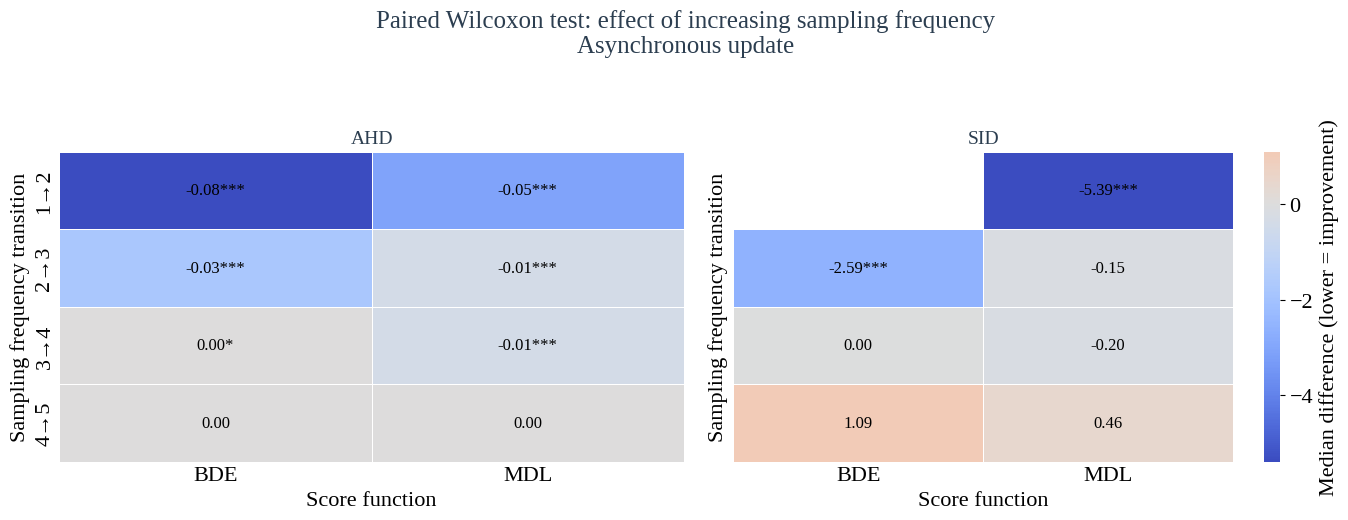

In [36]:
df_wilcoxon = compute_wilcoxon_table(
    df_series,
    metrics=["AHD", "SID"],
    transitions=[(1,2), (2,3), (3,4), (4,5)]
)


fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

plot_wilcoxon_heatmap(
    df_wilcoxon,
    metric="AHD",
    update_mode="asynchronous",
    transitions_order=["1→2", "2→3", "3→4", "4→5"],
    ax=axes[0],
    cbar=False
)

plot_wilcoxon_heatmap(
    df_wilcoxon,
    metric="SID",
    update_mode="asynchronous",
    transitions_order=["1→2", "2→3", "3→4", "4→5"],
    ax=axes[1],
    cbar=True
)

fig.suptitle(
    "Paired Wilcoxon test: effect of increasing sampling frequency\n"
    "Asynchronous update",
    fontsize=18,
    y=1.05
)

plt.tight_layout()
plt.show()



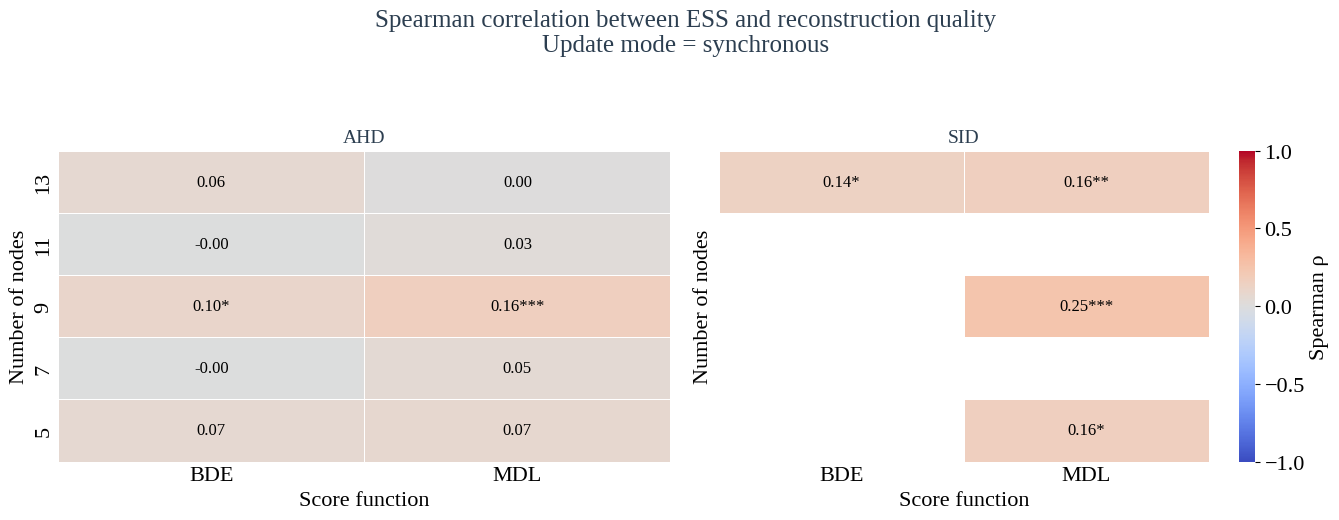

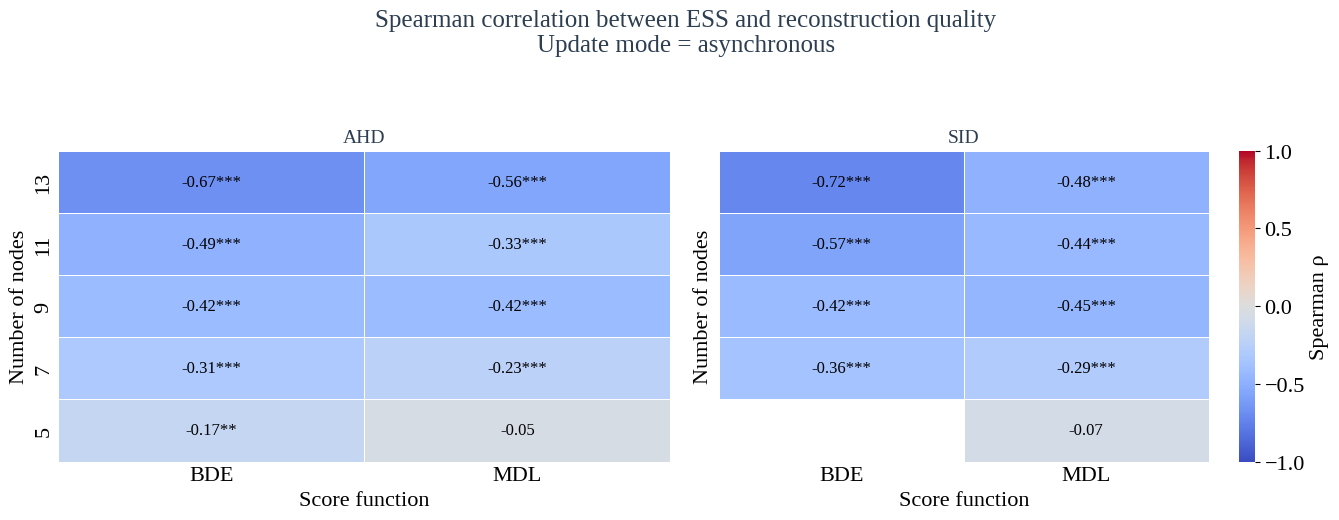

<Figure size 640x480 with 0 Axes>

In [41]:
df_spearman = compute_spearman_table(
    df_series,
    metrics=["AHD", "SID"]
)

for update_mode in ["synchronous", "asynchronous"]:

    fig, axes = plt.subplots(
        1, 2,
        figsize=(14, 5),
        sharey=True
    )

    plot_spearman_heatmap(
        df_spearman,
        metric="AHD",
        update_mode=update_mode,
        num_nodes_order=sorted(df_series["num_nodes"].unique(), reverse=True),
        ax=axes[0],
        cbar=False
    )

    plot_spearman_heatmap(
        df_spearman,
        metric="SID",
        update_mode=update_mode,
        num_nodes_order=sorted(df_series["num_nodes"].unique(), reverse=True),
        ax=axes[1],
        cbar=True
    )

    fig.suptitle(
        "Spearman correlation between ESS and reconstruction quality\n"
        f"Update mode = {update_mode}",
        fontsize=18,
        y=1.05
    )

    plt.tight_layout()
    plt.show()

plt.tight_layout()
plt.show()

